In [242]:
# El objetivo es analizar las ventas de productos de cuidado de cabello y responder a preguntas planteadas como:
# En Febrero, ¿Cuál fue el crecimiento o decrecimiento de ventas en 2020 con respecto al año sigueinte 2021?,
# ¿Cuales son los mejores productos por ventas netas y cantidad de items?
# De acuerdo a los inventarios, ¿Cuáles son las farmacias con mayor cantidad?
# Por último, estimar cuanto se espera vender para el 2022 en Febrero del producto Shampoo Magnificent en dolares y unidades

In [1]:
from tkinter import filedialog
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
file_dic = filedialog.askopenfilename(title = 'Archivo')
file_dic

'C:/Users/maic0/OneDrive/Escritorio/DATA ANALYST/P1/Cuidado del Cabello 2023 .xlsx'

In [3]:
rt = file_dic
df1 = pd.read_excel(rt, sheet_name = 0, header = 2)
df1.head(6)

,Año,Fecha,Nombre Categoría,Nombre Subcategoria,Nombre SubCategoria 2,Código Producto,Nombre Producto,Nombre Corto Unidad de Negocio,Código Local,Nombre Local,Cantidad Items,Venta Neta,Costo Total de Venta
0,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100147247,ACONDICIONADOR IL SALONE EPIC 500 ML,FYBECA,12,FYBECA PLAZA DE LAS AMERICAS,1,28.499999,29.792
1,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100147247,ACONDICIONADOR IL SALONE EPIC 500 ML,FYBECA,15,FYBECA CORUÑA,1,28.499999,29.792
2,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100181637,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,FYBECA,15,FYBECA CORUÑA,1,31.900000,29.792
3,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100181637,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,FYBECA,25,FYBECA CUMBAYA,1,31.900000,29.792
4,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100181637,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,FYBECA,31,FYBECA CARCELEN,1,31.900000,29.792
5,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,ACONDICIONADOR CREMA Y TRATAMIENTOS COSMETICOS,ACONDICIONADOR IL SALONE.,100181637,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,FYBECA,60,FYBECA MALL DEL SOL,1,31.900000,29.792


In [4]:
df1.shape
# El DataFrame esta conformado por 4857 observaciones en 13 columnas

(4857, 13)

In [5]:
df1.info()
# Conformado por varibles de tipo cuantitativo y cualitativo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Año                             4857 non-null   int64         
 1   Fecha                           4857 non-null   datetime64[ns]
 2   Nombre Categoría                4857 non-null   object        
 3   Nombre Subcategoria             4857 non-null   object        
 4   Nombre SubCategoria 2           4857 non-null   object        
 5   Código Producto                 4857 non-null   int64         
 6   Nombre Producto                 4857 non-null   object        
 7   Nombre Corto Unidad de Negocio  4857 non-null   object        
 8   Código Local                    4857 non-null   int64         
 9   Nombre Local                    4857 non-null   object        
 10  Cantidad Items                  4857 non-null   int64         
 11  Vent

In [6]:
# Estadisticas Descriptivas
df1.describe()

,Año,Código Producto,Código Local,Cantidad Items,Venta Neta,Costo Total de Venta
count,4857.000000,4.857000e+03,4857.00000,4857.000000,4857.000000,4857.000000
mean,2020.649578,1.001794e+08,5971.52028,1.242537,31.088450,28.390521
std,0.477151,3.477929e+04,18601.73307,0.547627,13.822533,13.346023
min,2020.000000,1.001472e+08,1.00000,-2.000000,-57.000000,-59.584000
25%,2020.000000,1.001475e+08,45.00000,1.000000,25.349999,18.620000
50%,2021.000000,1.001641e+08,631.00000,1.000000,26.600000,29.792000
75%,2021.000000,1.002170e+08,1668.00000,1.000000,37.249999,34.608000
max,2021.000000,1.002516e+08,72068.00000,6.000000,151.250000,148.960000


In [7]:
df1.iloc[:, 0].value_counts()
# Los datos estan conformados unicamente de dos año 2020 y 2021, de igual manera febrero y marzo

2021    3155
2020    1702
Name: Año, dtype: int64

In [8]:
# Filas
df1.isna().any(axis = 0).sum()

# Columnas
df1.isna().any(axis = 1).sum()

# No se presentan datos faltantes, ni duplicados

0

In [9]:
df1.duplicated().sum()

0

## **En Febrero ¿Cuál es el crecimiento o decrecimiento de ventas en 2020 respecto de 2021?**

In [10]:
df1['Mes'] = df1['Fecha'].dt.strftime('%B')
df1.tail(5)

,Año,Fecha,Nombre Categoría,Nombre Subcategoria,Nombre SubCategoria 2,Código Producto,Nombre Producto,Nombre Corto Unidad de Negocio,Código Local,Nombre Local,Cantidad Items,Venta Neta,Costo Total de Venta,Mes
4852,2021,2021-03-31,TINTES Y COLORACION,TINTES PERMANENTES,TINTE IL SALONE,100164068,TINTE IL SALONNE COLORE # 7.1,FYBECA,1,FYBECA BATAN,1,15.950001,17.304,March
4853,2021,2021-03-31,TINTES Y COLORACION,TINTES PERMANENTES,TINTE IL SALONE,100164068,TINTE IL SALONNE COLORE # 7.1,FYBECA,19,FYBECA QUICENTRO,1,15.950001,17.304,March
4854,2021,2021-03-31,TINTES Y COLORACION,TINTES PERMANENTES,TINTE IL SALONE,100164068,TINTE IL SALONNE COLORE # 7.1,FYBECA,631,FYBECA GRANADOS,1,15.950001,17.304,March
4855,2021,2021-03-31,TINTES Y COLORACION,TINTES PERMANENTES,TINTE IL SALONE,100164068,TINTE IL SALONNE COLORE # 7.1,FYBECA,1461,FYBECA SAN RAFAEL,1,15.950001,17.304,March
4856,2021,2021-03-31,TINTES Y COLORACION,TINTES PERMANENTES,TINTE IL SALONE,100164532,TINTE IL SALONE SLC COLORE YELLOW REMOVER,FYBECA,15,FYBECA CORUÑA,1,15.950001,17.304,March


In [11]:
df1['Fecha'].dt.month.value_counts()

3    2529
2    2328
Name: Fecha, dtype: int64

In [12]:
df1[['Cantidad Items']].value_counts()

Cantidad Items
 1                3695
 2                1038
 4                  49
 0                  30
 3                  26
-1                  13
-2                   4
 5                   1
 6                   1
dtype: int64

In [13]:
ventas_fe = df1.query('Mes == "February"').groupby(by = 'Año').agg({'Venta Neta': 'sum'}).round(2).reset_index()
ventas_fe

,Año,Venta Neta
0,2020,36015.22
1,2021,39876.83


In [14]:
dif_2021 = df1.query('Mes == "February"').groupby(by = 'Año').agg({'Venta Neta': 'sum'}).diff()
crec_2020_2021 = ((dif_2021.iloc[1] / ventas_fe.iloc[0]) * 100).round(1)
crec_2020_2021[1]

10.7

[[], Text(0.5, 1.0, 'Crecimiento de 2020 con respecto a 2021'), (0.0, 48000.0)]

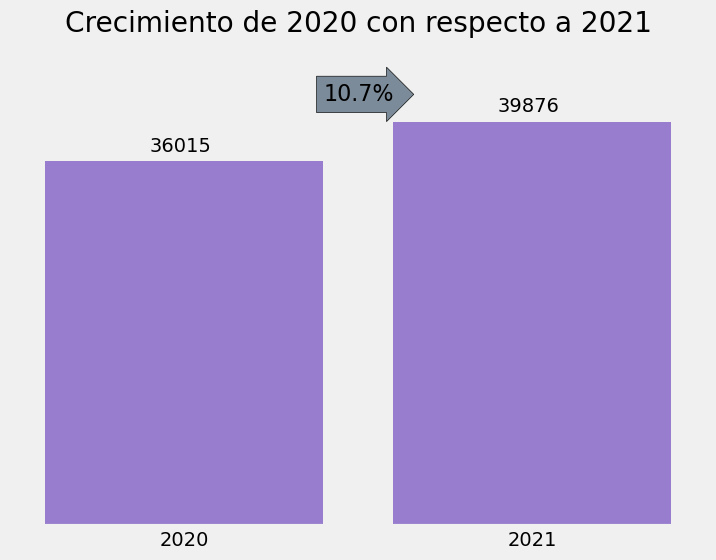

In [15]:
plt.figure(figsize = (8, 6))
ax = sns.barplot(data = ventas_fe, x = 'Año', y = 'Venta Neta', color = 'mediumpurple')
ax.text(0.4, 42000, f'{crec_2020_2021[1]}%', fontsize = 16, bbox = dict(facecolor = 'slategrey', alpha = .9, boxstyle = 'rarrow, pad = 0.3', ec = 'black'))

for i in ax.patches:
    ax.text(i.get_x() + .3, 1000 + i.get_height(), int(i.get_height()))


ax.set_ylabel('')
ax.set_xlabel('')
ax.set(yticks = [], title = 'Crecimiento de 2020 con respecto a 2021', ylim = (0, 48000))

**El crecimiento de ventas en 2020 con respecto de 2021 es del 10.72%**

## **¿Cuáles son los mejores productos de venta? los 5 mejores productos para Fybeca y Sana Sana.**

In [16]:
df1.iloc[:, 7].value_counts()

FYBECA          4249
SANASANA         606
FRANQUICIADO       2
Name: Nombre Corto Unidad de Negocio, dtype: int64

### *FYBECA* **FARCOMED**

**En general 2020 y 2021**

In [17]:
df_FYBECA_2020_2021 = df1.query('`Nombre Corto Unidad de Negocio` == "FYBECA"')[['Nombre Producto', 'Venta Neta']].groupby(by = 'Nombre Producto')\
.agg({'Venta Neta' : 'sum'}).round(2) \
.sort_values(by = 'Venta Neta', ascending = False).head(5) \
.reset_index()

df_FYBECA_2020_2021

,Nombre Producto,Venta Neta
0,SHAMPOO IL SALONE MAGNIFICENT 500 ML,13399.05
1,SHAMPOO IL SALONE GLORIOUS 500 ML,8756.17
2,SHAMPOO IL SALONE MYTHIC 500 ML,6997.30
3,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,5996.72
4,PACK IL SALONE GLORIOUS SHAMPOO 500 ML + ACOND...,5813.65


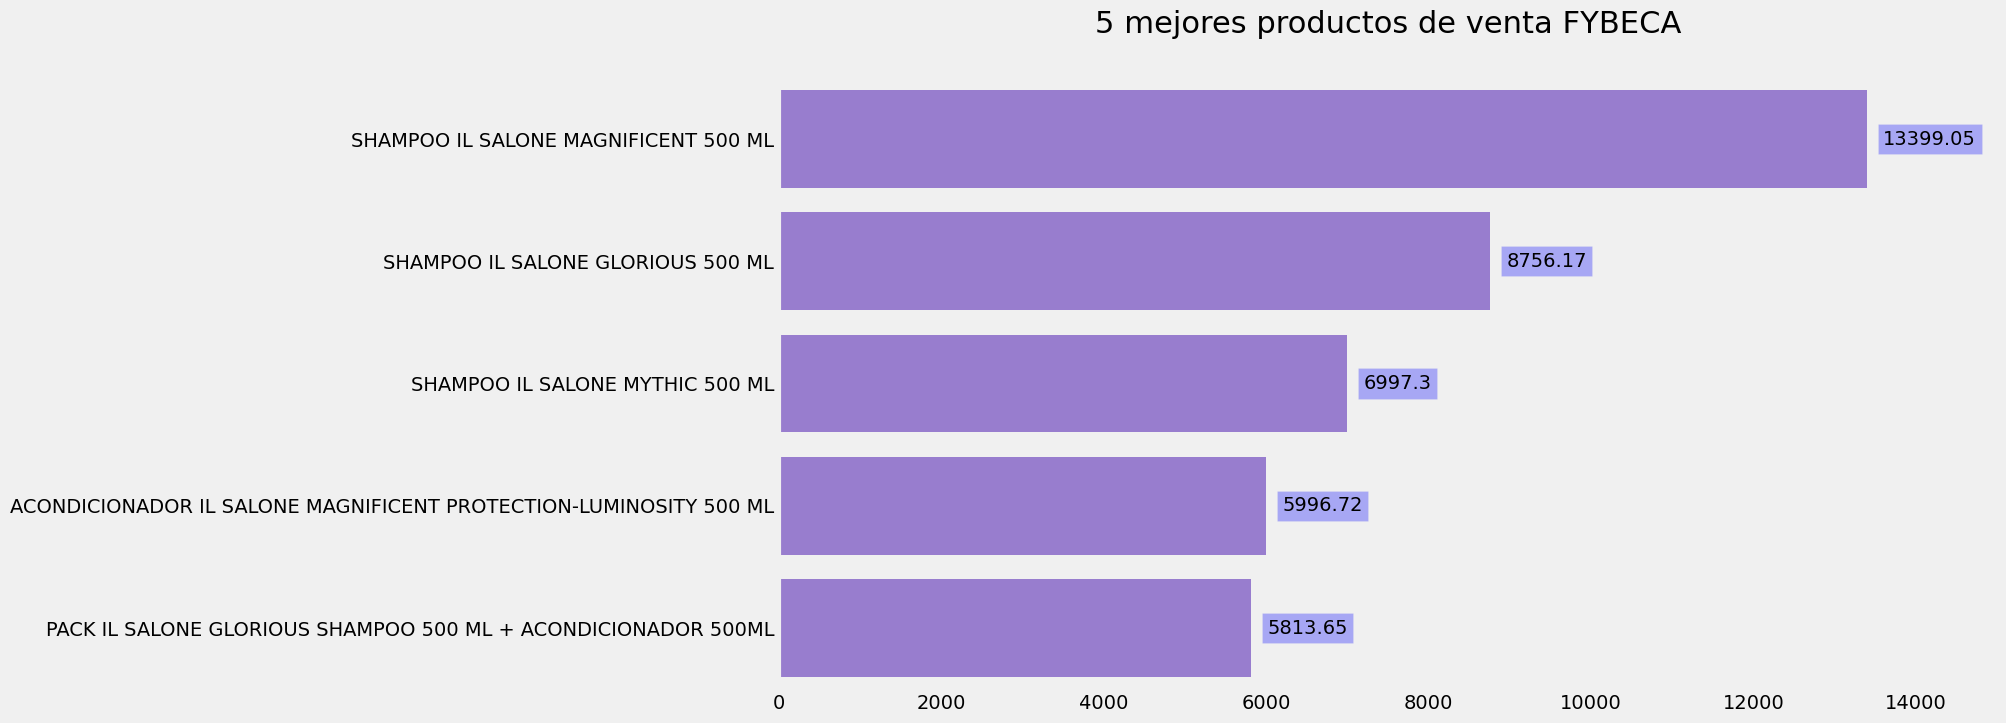

In [18]:
plt.figure(figsize = (14, 8))
ax = sns.barplot(data = df_FYBECA_2020_2021, y = 'Nombre Producto', x = 'Venta Neta', color = 'mediumpurple')

for i in ax.patches:
    ax.text(200 + i.get_width(), i.get_y() + i.get_height() / 2, i.get_width(), va = 'center', bbox = dict(facecolor = 'blue', alpha = 0.3))
    
ax.set(title = '5 mejores productos de venta FYBECA', xlim = (0, 15000), ylabel = '', xlabel = '', ylim = (4.5, -0.8))
ax.set_title(label = '5 mejores productos de venta FYBECA', fontdict = dict(fontsize = 22))
ax.grid(False)

### **5 productos mas vendidos por cantidad  (FYBECA)**

In [19]:
df_CANT_IT_FYBECA = df1.query('`Nombre Corto Unidad de Negocio` == "FYBECA" and `Cantidad Items` >= 1')[['Nombre Producto', 'Cantidad Items']] \
.groupby(by = 'Nombre Producto').agg({'Cantidad Items' : 'sum'}) \
.sort_values(by = 'Cantidad Items', ascending = False).round(0) \
.head(5) \
.reset_index()

df_CANT_IT_FYBECA

,Nombre Producto,Cantidad Items
0,SHAMPOO IL SALONE MAGNIFICENT 500 ML,438
1,SHAMPOO IL SALONE GLORIOUS 500 ML,291
2,TINTE IL SALONNE COLORE # 8.1,288
3,TINTE IL SALONNE COLORE # 12.11,238
4,TINTE IL SALONNE COLORE # 9.1,231


[Text(0.5, 0, ''), Text(0, 0.5, ''), (0.0, 500.0), (4.5, -0.8), []]

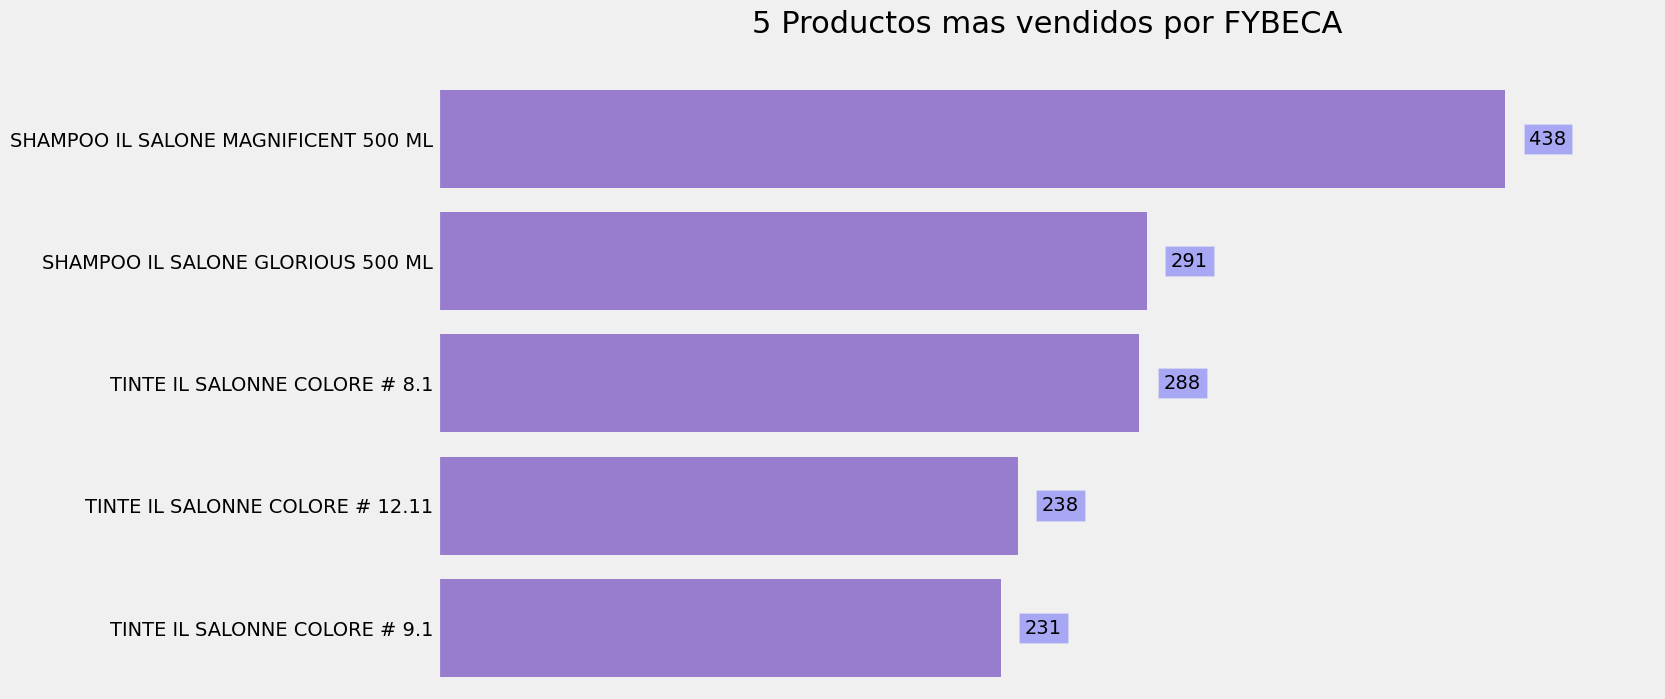

In [20]:
plt.figure(figsize = (14, 8))
ax = sns.barplot(data = df_CANT_IT_FYBECA, x = 'Cantidad Items', y = 'Nombre Producto', color = 'mediumpurple')

for i in ax.patches:
    ax.text(10 + i.get_width(), i.get_y() + i.get_height() / 2, f'{int(i.get_width())}', 
            va = 'center', bbox = dict(facecolor = 'blue', alpha = 0.3))
    
ax.set_title('5 Productos mas vendidos por FYBECA', fontdict = dict(fontsize = 22))
ax.set(xlabel = '', ylabel = '', xlim = (0, 500), ylim = (4.5, -0.8), xticks = [])

### **5 productos con mayor venta neta para FYBECA 2020**

In [21]:
FYBECA_2020 = df1.query('`Nombre Corto Unidad de Negocio` == "FYBECA" and Año == 2020')[['Año', 'Nombre Producto', 'Venta Neta']] \
.groupby(by = 'Nombre Producto').agg({'Venta Neta' : 'sum'}).round(1).sort_values(by = 'Venta Neta', ascending = False).head(5) \
.reset_index() 
FYBECA_2020

,Nombre Producto,Venta Neta
0,SHAMPOO IL SALONE MAGNIFICENT 500 ML,9364.6
1,SHAMPOO IL SALONE GLORIOUS 500 ML,5588.8
2,SHAMPOO IL SALONE MYTHIC 500 ML,4061.7
3,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,3629.9
4,TRAMIENTO IL SALONE OLIO RESTRUCTURANTE CAB. M...,3522.8


### **5 productos con mayor venta neta para FYBECA 2021**

In [22]:
FYBECA_2021 = df1.query('`Nombre Corto Unidad de Negocio` == "FYBECA" and Año == 2021')[['Año', 'Nombre Producto', 'Venta Neta']] \
.groupby(by = 'Nombre Producto').agg({'Venta Neta' : 'sum'}).round(1).sort_values(by = 'Venta Neta', ascending = False).head(5) \
.reset_index()

FYBECA_2021

,Nombre Producto,Venta Neta
0,PACK IL SALONE GLORIOUS SHAMPOO 500 ML + ACOND...,5813.7
1,PACK IL SALONE MAGNIFICENT SHAMPOO 500 ML + AC...,4480.1
2,SHAMPOO IL SALONE MAGNIFICENT 500 ML,4034.4
3,SHAMPOO IL SALONE GLORIOUS 500 ML,3167.4
4,PACK IL SALONE MITHYC SHAMPOO 500 ML + ACONDIC...,3101.7


In [23]:
df_result_FY = df1.query('`Nombre Corto Unidad de Negocio` == "FYBECA"')[['Año', 'Nombre Producto', 'Venta Neta']] \
.groupby(['Año', 'Nombre Producto']).agg({'Venta Neta' : 'sum'}).round(1) \
.sort_values(by = ['Año', 'Venta Neta'], ascending = [True, False])

top_5_FY = df_result_FY.groupby('Año').head(5).reset_index() 
top_5_FY

,Año,Nombre Producto,Venta Neta
0,2020,SHAMPOO IL SALONE MAGNIFICENT 500 ML,9364.6
1,2020,SHAMPOO IL SALONE GLORIOUS 500 ML,5588.8
2,2020,SHAMPOO IL SALONE MYTHIC 500 ML,4061.7
3,2020,ACONDICIONADOR IL SALONE MAGNIFICENT PROTECTIO...,3629.9
4,2020,TRAMIENTO IL SALONE OLIO RESTRUCTURANTE CAB. M...,3522.8
5,2021,PACK IL SALONE GLORIOUS SHAMPOO 500 ML + ACOND...,5813.7
6,2021,PACK IL SALONE MAGNIFICENT SHAMPOO 500 ML + AC...,4480.1
7,2021,SHAMPOO IL SALONE MAGNIFICENT 500 ML,4034.4
8,2021,SHAMPOO IL SALONE GLORIOUS 500 ML,3167.4
9,2021,PACK IL SALONE MITHYC SHAMPOO 500 ML + ACONDIC...,3101.7


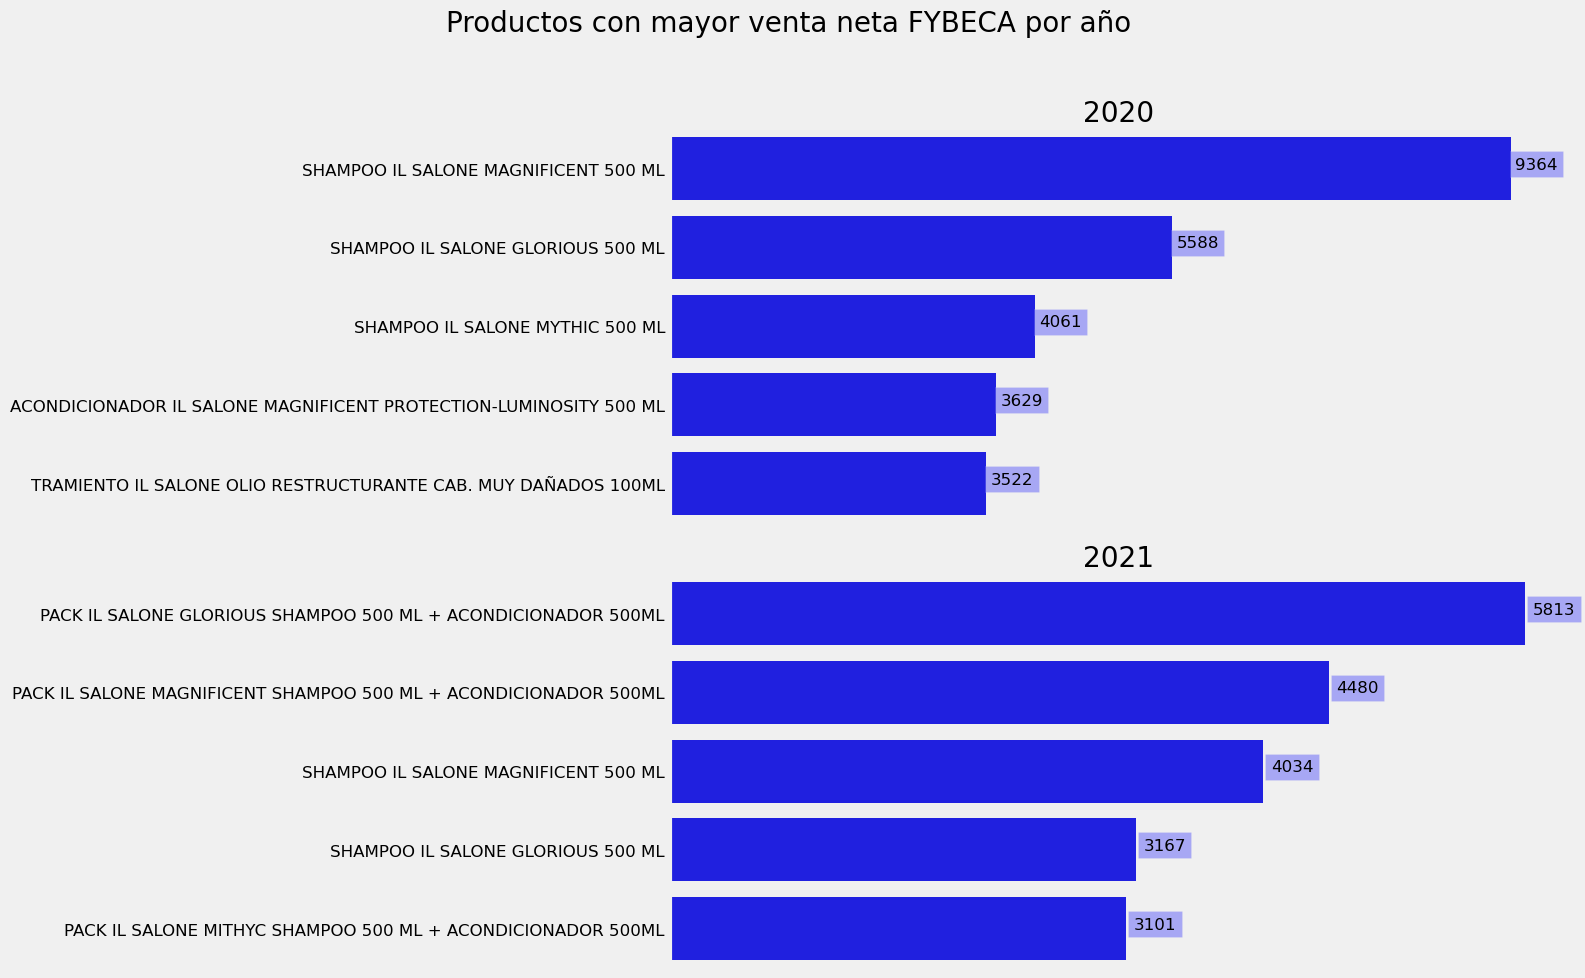

In [244]:
data_2020 = top_5_FY[top_5_FY['Año'] == 2020]
data_2021 = top_5_FY[top_5_FY['Año'] == 2021]

plt.figure(figsize=(16, 10))


ax1 = plt.subplot(2, 1, 1)
sns.barplot(data=data_2020, x='Venta Neta', y='Nombre Producto', color='blue', ax=ax1)
ax1.set_title('2020')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlim(right = 10000)
ax1.set(xticks = [])


for i in ax1.patches:
    ax1.text(50 + i.get_width(), i.get_y() + i.get_height() / 2, f'{int(i.get_width())}', size = 12, bbox = dict(facecolor = 'blue', alpha = .3))


ax2 = plt.subplot(2, 1, 2)
sns.barplot(data=data_2021, x='Venta Neta', y='Nombre Producto', color='blue', ax=ax2)
ax2.set_title('2021')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis='y', labelsize=12)
ax2.set(xticks = [])

for i in ax2.patches:
    ax2.text(50 + i.get_width(), i.get_y() + i.get_height() / 2, f'{int(i.get_width())}', size = 12, bbox = dict(facecolor = 'blue', alpha = .3))

plt.suptitle('Productos con mayor venta neta FYBECA por año', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])

## **5 productos con mayor venta neta para SANA SANA**

In [45]:
df_SANASANA = df1.query('`Nombre Corto Unidad de Negocio` == "SANASANA"') \
.groupby(by = 'Nombre Producto').agg({'Venta Neta' : 'sum'}) \
.sort_values(by = 'Venta Neta', ascending = False) \
.reset_index().head(5)

df_SANASANA 

,Nombre Producto,Venta Neta
0,PACK IL SALONE # 9.1 RUBIO CLARO HELADO,2678.225004
1,PACK IL SALONE # 1 NEGRO PURO,2141.750002
2,PACK IL SALONE # 8.1 RUBIO MEDIO HELADO,1622.024998
3,PACK IL SALONE # 7.7 RUBIO OSCURO CANELA,1297.250002
4,PACK IL SALONE # 7.1 RUBIO OSCURO HELADO,978.050002


[Text(0.5, 1.0, 'Productos con mayor venta neta (SANA SANA)'),
 Text(0.5, 0, ''),
 Text(0, 0.5, ''),
 []]

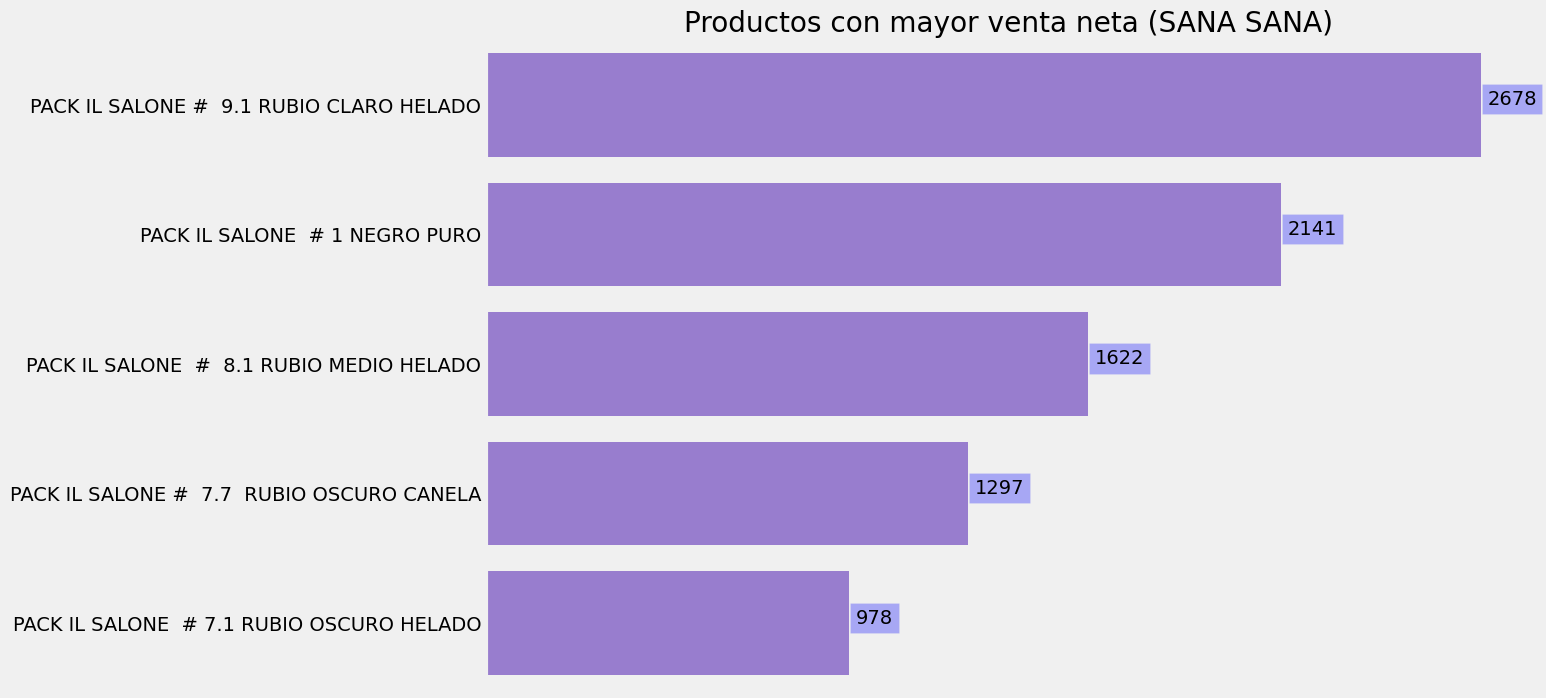

In [58]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(df_SANASANA, x = 'Venta Neta', y = 'Nombre Producto', color = 'mediumpurple')

for i in ax.patches:
    ax.text(i.get_width() + 18, i.get_y() + i.get_height() / 2, f'{int(i.get_width())}', bbox = dict(facecolor = 'blue', alpha = .3))
    
ax.set(title = 'Productos con mayor venta neta (SANA SANA)', xlabel = '', ylabel = '', xticks = [])  

## **¿Cuáles son las farmacias con más inventario? 5 farmacias con más inventario para Fybeca (FARCOMED) como Sana Sana (ECONOFARM)**

In [25]:
df2 = pd.read_excel(rt, sheet_name = 1)
df2

,CODIGO EMPRESA,NOMBRE EMPRESA,CODIGO PDV,NOMBRE PDV,NOMBRE PRODUCTO,NOMBRE PRODUCTO.1,ESTADO ARTICULO,MINIMO,COSTO PROMEDIO,STOCK,Fecha Stock
0,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,1802,CERRADO FYBECA AEROPLAZA,100147239,TRATAMIENTO IL SALONE LISCIO PROGR. CAP. DANNEG.,INACTIVO,0.0,44.100,0,2021-02-28
1,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,1802,CERRADO FYBECA AEROPLAZA,100147242,TRATAMIENTO IL SALONE ETERNAL LEAVE-IN CAB. TI...,INACTIVO,0.0,28.420,0,2021-02-28
2,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,1802,CERRADO FYBECA AEROPLAZA,100147243,TRATAMIENTO IL SALONE CAB TINTURADOS 250 ML,INACTIVO,0.0,28.420,0,2021-02-28
3,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,1802,CERRADO FYBECA AEROPLAZA,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,INACTIVO,0.0,29.792,0,2021-02-28
4,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,1802,CERRADO FYBECA AEROPLAZA,100147245,TRATAMIENTO IL SALONE ENHANCING CHOCOLATE 150 ML,INACTIVO,0.0,28.420,0,2021-02-28
...,...,...,...,...,...,...,...,...,...,...,...
12269,8,ECONOFARM S.A.,71599,SANASANA ZARUMA,100251639,TINTE ALTA MODA TONO N°6.35 RUBIO OSCURO DORAD...,NO DISCONTINUADO,2.0,8.120,2,2021-02-28
12270,8,ECONOFARM S.A.,71599,SANASANA ZARUMA,100251640,SHAMPOO ALTA MODA HAIR REPAIR 300ML,NO DISCONTINUADO,2.0,10.024,2,2021-02-28
12271,8,ECONOFARM S.A.,71599,SANASANA ZARUMA,100251641,ACONDICIONADOR ALTA MODA ALFAKERATIN 300ML,NO DISCONTINUADO,2.0,10.024,2,2021-02-28
12272,8,ECONOFARM S.A.,71599,SANASANA ZARUMA,100251642,ACONDICIONADOR ALTA MODA HAIR REPAIR 300ML,NO DISCONTINUADO,2.0,10.024,2,2021-02-28


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12274 entries, 0 to 12273
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CODIGO EMPRESA     12274 non-null  int64         
 1   NOMBRE EMPRESA     12274 non-null  object        
 2   CODIGO PDV         12274 non-null  int64         
 3   NOMBRE PDV         12274 non-null  object        
 4   NOMBRE PRODUCTO    12274 non-null  int64         
 5   NOMBRE PRODUCTO.1  12274 non-null  object        
 6   ESTADO ARTICULO    12274 non-null  object        
 7   MINIMO             10216 non-null  float64       
 8   COSTO PROMEDIO     12274 non-null  float64       
 9   STOCK              12274 non-null  int64         
 10  Fecha Stock        12274 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [27]:
df2.isnull().any(axis = 0)

CODIGO EMPRESA       False
NOMBRE EMPRESA       False
CODIGO PDV           False
NOMBRE PDV           False
NOMBRE PRODUCTO      False
NOMBRE PRODUCTO.1    False
ESTADO ARTICULO      False
MINIMO                True
COSTO PROMEDIO       False
STOCK                False
Fecha Stock          False
dtype: bool

In [28]:
df2[['MINIMO']].value_counts()

MINIMO
2.0       6204
3.0       1589
0.0       1288
1.0       1116
6.0         17
4.0          2
dtype: int64

In [29]:
df2.loc[df2.isna().any(axis = 1)]

,CODIGO EMPRESA,NOMBRE EMPRESA,CODIGO PDV,NOMBRE PDV,NOMBRE PRODUCTO,NOMBRE PRODUCTO.1,ESTADO ARTICULO,MINIMO,COSTO PROMEDIO,STOCK,Fecha Stock
45,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,71888,CERRADO FYBECA ALBAN BORJA 2,100164058,TINTE IL SALONNE COLORE # 7,INACTIVO,NaN,17.304,0,2021-02-28
47,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,71888,CERRADO FYBECA ALBAN BORJA 2,100164060,TINTE IL SALONNE COLORE # 12.11,INACTIVO,NaN,17.304,0,2021-02-28
48,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,71888,CERRADO FYBECA ALBAN BORJA 2,100164066,TINTE IL SALONNE COLORE # 9.1,INACTIVO,NaN,17.304,0,2021-02-28
49,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,71888,CERRADO FYBECA ALBAN BORJA 2,100164067,TINTE IL SALONNE COLORE # 8.1,INACTIVO,NaN,17.304,0,2021-02-28
66,1,FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FAR...,2120,CERRADO FYBECA TONSUPA,294379,AGUA OXIGENADA PROFESIONAL YE YE OXIDANTE 10 V...,INACTIVO,NaN,0.000,0,2021-02-28
...,...,...,...,...,...,...,...,...,...,...,...
12017,8,ECONOFARM S.A.,71922,SANASANA VALENCIA 2,100232845,PACK IL SALONE # 7.7 RUBIO OSCURO CANELA,PROXIMO,NaN,18.620,0,2021-02-28
12018,8,ECONOFARM S.A.,71922,SANASANA VALENCIA 2,100232847,PACK IL SALONE # 7.1 RUBIO OSCURO HELADO,PROXIMO,NaN,18.620,0,2021-02-28
12019,8,ECONOFARM S.A.,71922,SANASANA VALENCIA 2,100232848,PACK IL SALONE # 8.1 RUBIO MEDIO HELADO,PROXIMO,NaN,18.620,0,2021-02-28
12020,8,ECONOFARM S.A.,71922,SANASANA VALENCIA 2,100232850,PACK IL SALONE # 9.1 RUBIO CLARO HELADO,PROXIMO,NaN,18.620,0,2021-02-28


In [30]:
df2['NOMBRE EMPRESA'].value_counts()

ECONOFARM S.A.                                         5885
FARMACIAS Y COMISARIATOS DE MEDICINAS S.A. FARCOMED    5712
FARMAGESTION S.A.                                       677
Name: NOMBRE EMPRESA, dtype: int64

### **FYBECA (FARCOMED)**

In [31]:
df_stock_FY = df2[df2['NOMBRE EMPRESA'].str.contains('FARCOMED')][['NOMBRE PDV', 'STOCK']] \
.groupby(by = 'NOMBRE PDV').agg({'STOCK' : sum}) \
.sort_values(by = 'STOCK', ascending = False).head(5).reset_index()

df_stock_FY

,NOMBRE PDV,STOCK
0,FYBECA ALBORADA,277
1,FYBECA EL RECREO,221
2,FYBECA VILLA CLUB,197
3,FYBECA MACHALA,188
4,FYBECA PLAZA KENNEDY,186


### **SANA SANA (ECONOFARM)**

In [32]:
df_stock_SA = df2[df2['NOMBRE EMPRESA'].str.contains('ECONOFARM')][['NOMBRE PDV', 'STOCK']] \
.groupby(by = 'NOMBRE PDV').agg({'STOCK' : 'sum'}) \
.sort_values(by = 'STOCK', ascending = False).head(5).reset_index()
df_stock_SA

,NOMBRE PDV,STOCK
0,SANASANA ILLINIZAS,55
1,SANASANA VICTOR EMILIO ESTRADA,52
2,SANASANA ALCAFI MACHALA,50
3,SANASANA EL BEATERIO,50
4,SANASANA EL CONDE,49


In [33]:
rep = []
    
for i in ['SANA SANA', 'FYBECA']:
    rep.extend([i] * len(df_stock_SA))
    print(rep)

['SANA SANA', 'SANA SANA', 'SANA SANA', 'SANA SANA', 'SANA SANA']
['SANA SANA', 'SANA SANA', 'SANA SANA', 'SANA SANA', 'SANA SANA', 'FYBECA', 'FYBECA', 'FYBECA', 'FYBECA', 'FYBECA']


In [34]:
rep.reverse()
rep

['FYBECA',
 'FYBECA',
 'FYBECA',
 'FYBECA',
 'FYBECA',
 'SANA SANA',
 'SANA SANA',
 'SANA SANA',
 'SANA SANA',
 'SANA SANA']

In [35]:
df_stock_FY['EMPRESA'] = rep[0:5]
df_stock_SA['EMPRESA'] = rep[5:10]

In [36]:
df_stock_FYSA = pd.concat([df_stock_FY, df_stock_SA], axis = 0).reset_index()
df_stock_FYSA = df_stock_FYSA.drop('index', axis = 1)
df_stock_FYSA

,NOMBRE PDV,STOCK,EMPRESA
0,FYBECA ALBORADA,277,FYBECA
1,FYBECA EL RECREO,221,FYBECA
2,FYBECA VILLA CLUB,197,FYBECA
3,FYBECA MACHALA,188,FYBECA
4,FYBECA PLAZA KENNEDY,186,FYBECA
5,SANASANA ILLINIZAS,55,SANA SANA
6,SANASANA VICTOR EMILIO ESTRADA,52,SANA SANA
7,SANASANA ALCAFI MACHALA,50,SANA SANA
8,SANASANA EL BEATERIO,50,SANA SANA
9,SANASANA EL CONDE,49,SANA SANA


C:\Users\maic0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


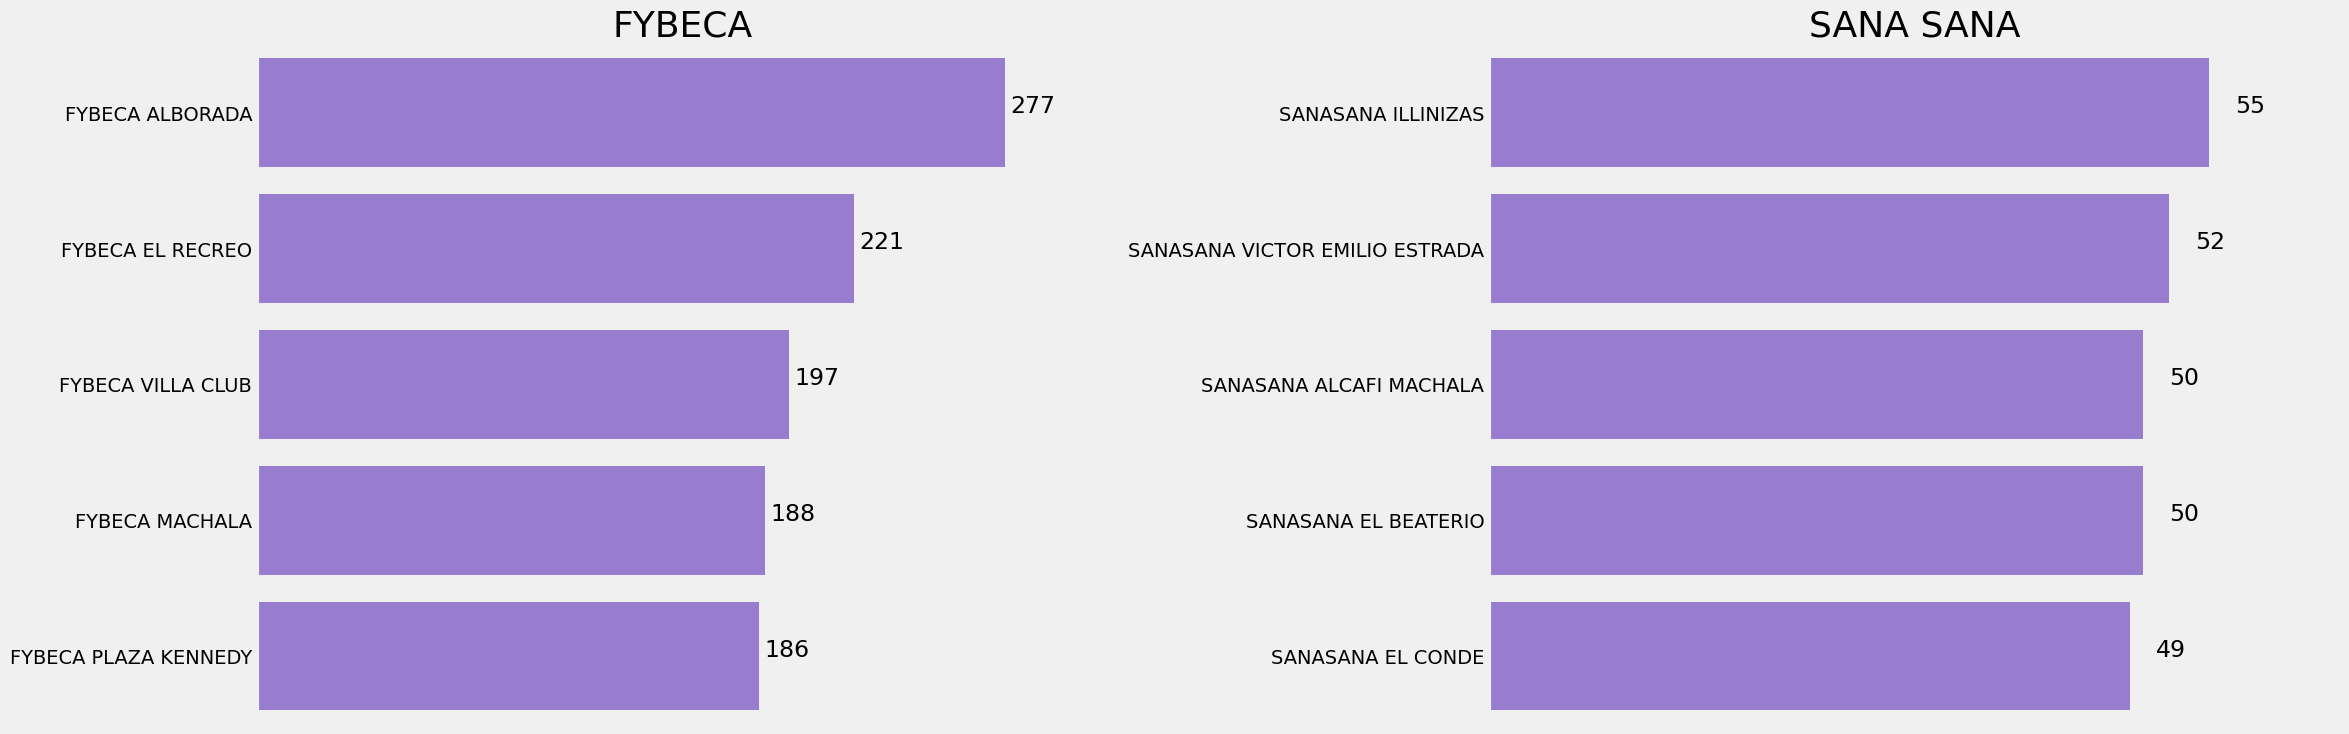

In [37]:
g = sns.FacetGrid(data = df_stock_FYSA, col = 'EMPRESA', sharey = False, sharex = False, height = 8, aspect = 1.5)
g.map(sns.barplot, 'STOCK', 'NOMBRE PDV', color = 'mediumpurple')

g.set_titles(col_template = '{col_name}', size = 26)

for i, ax in zip(g.axes.flat, g.col_names):
    if ax == 'FYBECA':
        i.set_xlim(0, 315)
    elif ax == 'SANA SANA':
            i.set_xlim(0, 65)
            #i.set(xlabel = '')

for i in g.axes.flat:
    i.set(xlabel = '', ylabel = '')
    #i.tick_params(axis = 'y', size = 22)
    i.set_xticks([])
    
    for ax in i.patches:
        i.text(2 + ax.get_width(), ax.get_y() + ax.get_height() / 2, f'{int(ax.get_width())}', size = 17) 

# **¿Cuánto se espera vender en Feb 2022 del Shampoo Magnificent en dólares y unidades?**

In [38]:
df1_february = df1[(df1['Nombre Producto'].str.contains('MAGNIFICENT 500')) & (df1['Mes'] == 'February')]

df_ventas_items_t = df1_february.groupby(by = 'Año').agg({
    'Cantidad Items' : 'sum',
    'Venta Neta' : 'sum'
}).round(2).reset_index()

In [39]:
df_ventas_items_t[['Venta Neta', 'Cantidad Items']].mean()

Venta Neta        3253.75
Cantidad Items     104.50
dtype: float64

**Asuminedo que las ventas siguen una tendencia estable similar a los años anteriores en promedio para el 2022 en Febrero se espera realizar una venta neta de 3253.72 con un total de 105 unidades**

### **Por medio de regresion lineal (Venta Neta)**

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [246]:
df1_february = df1[(df1['Nombre Producto'].str.contains('MAGNIFICENT 500')) & (df1['Mes'] == 'February')]
df1_february

,Año,Fecha,Nombre Categoría,Nombre Subcategoria,Nombre SubCategoria 2,Código Producto,Nombre Producto,Nombre Corto Unidad de Negocio,Código Local,Nombre Local,Cantidad Items,Venta Neta,Costo Total de Venta,Mes
34,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,15,FYBECA CORUÑA,2,56.999998,59.584,February
35,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,25,FYBECA CUMBAYA,1,28.499999,29.792,February
36,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,60,FYBECA MALL DEL SOL,4,113.999995,119.168,February
37,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,94,FYBECA GONZALEZ SUAREZ,1,28.499999,29.792,February
38,2020,2020-02-01,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,141,FYBECA REMIGIO CRESPO,1,28.499999,29.792,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,2021,2021-02-28,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,26,FYBECA EL BOSQUE,1,26.600000,29.792,February
2262,2021,2021-02-28,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,128,FYBECA SALINAS,1,26.600000,29.792,February
2263,2021,2021-02-28,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,791,FYBECA MALL DE LOS ANDES,1,26.600000,29.792,February
2264,2021,2021-02-28,SHAMPOO ACONDICIONADOR Y TRATAMIENTO,SHAMPOO COSMETICOS,SHAMPOO CABELLO IL SALONE,100147244,SHAMPOO IL SALONE MAGNIFICENT 500 ML,FYBECA,1685,FYBECA VILLAGE PLAZA,1,26.600000,29.792,February


In [247]:
cant_items = df1_february.groupby(by = 'Fecha').agg({'Cantidad Items' : 'sum'}).reset_index()

In [248]:
df1_february = df1_february.groupby(by = 'Fecha').agg({'Venta Neta' : 'sum'}).reset_index()
df1_february['Fecha'] = pd.to_datetime(df1_february['Fecha'])
df1_february['Año'] = df1_february['Fecha'].dt.year
df1_february['Dia'] = df1_february['Fecha'].dt.day
df1_february['Dia Semana'] = df1_february['Fecha'].dt.dayofweek
df1_february['Cantidad Items'] = cant_items.iloc[:,1]
df1_february.head(5)

,Fecha,Venta Neta,Año,Dia,Dia Semana,Cantidad Items
0,2020-02-01,427.499982,2020,1,5,15
1,2020-02-02,37.249999,2020,2,6,1
2,2020-02-03,149.749998,2020,3,0,4
3,2020-02-04,148.999995,2020,4,1,4
4,2020-02-05,131.499998,2020,5,2,4
5,2020-02-06,131.499998,2020,6,3,4
6,2020-02-07,200.649999,2020,7,4,7
7,2020-02-08,143.649999,2020,8,5,5
8,2020-02-09,243.249994,2020,9,6,7
9,2020-02-10,205.999996,2020,10,0,6


<Axes: xlabel='Fecha', ylabel='Venta Neta'>

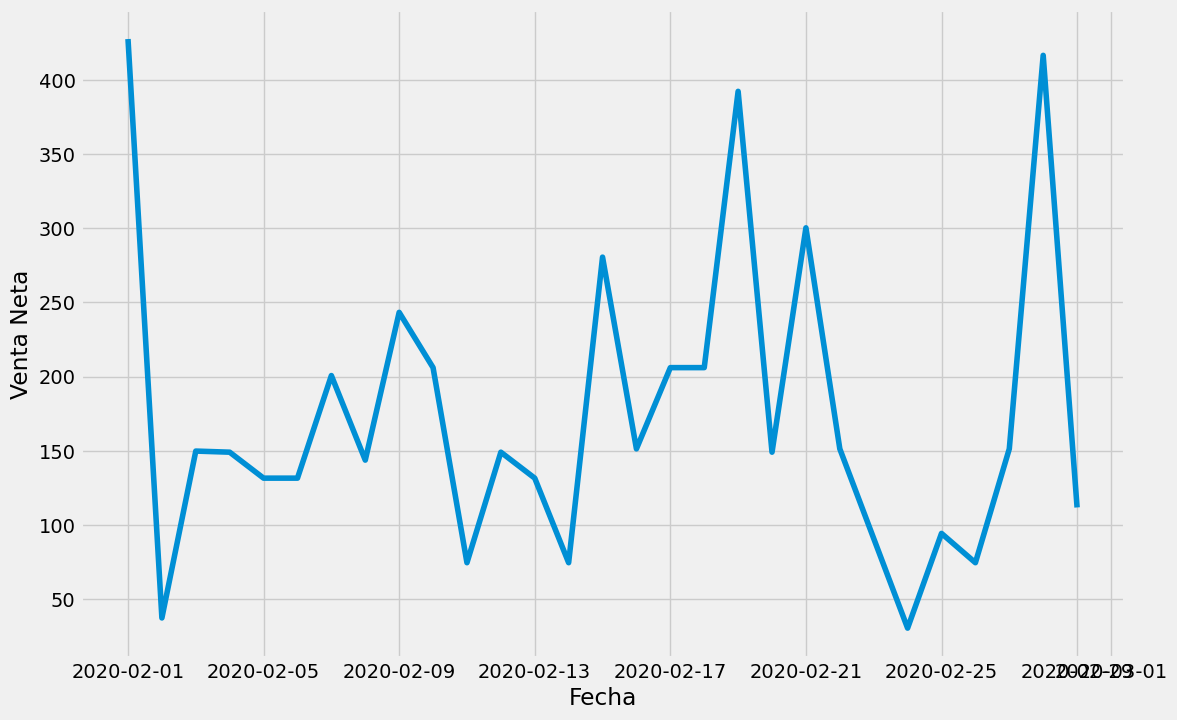

In [249]:
plt.figure(figsize = (12, 8))
sns.lineplot(df1_february[df1_february['Año'] == 2020], y = 'Venta Neta', x = 'Fecha')
#sns.lineplot(df1_february[df1_february['Año'] == 2021], y = 'Venta Neta', x = 'Fecha')

In [250]:
X = df1_february[['Año', 'Dia', 'Dia Semana', 'Cantidad Items']].values
y = df1_february['Venta Neta'].values

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 22)

In [252]:
# Modelo

regresion_mul = LinearRegression()
regresion_mul.fit(X_train, y_train)

LinearRegression()

In [253]:
# Predicciones

y_pred = regresion_mul.predict(X_test)

In [254]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
mse = mean_squared_error(y_test, y_pred, squared = True)

print(f'RMSE: {rmse:.2f} / MSE: {mse:.2f}')

RMSE: 7.15 / MSE: 51.13


In [255]:
# Prediccion para Febrero 2022

nw_data = np.array([[2022, 1, 1, df1_february['Cantidad Items'].mean()]])
print(f'El 1 de Febrero 2022 se estima realizar una venta neta de: {regresion_mul.predict(nw_data)[0]:.2f}')

El 1 de Febrero 2022 se estima realizar una venta neta de: 85.77


In [256]:
date_february_2022 =  pd.DataFrame({
    'Fecha' : pd.date_range(start = '2022-02-01', end = '2022-02-28')
    }
    )

In [257]:
date_february_2022['Año'] = date_february_2022['Fecha'].dt.year
date_february_2022['Dia'] = date_february_2022['Fecha'].dt.day
date_february_2022['Dia Semana'] = date_february_2022['Fecha'].dt.dayofweek
date_february_2022['Cantidad Items'] = df1_february['Cantidad Items'].mean()
date_february_2022 = date_february_2022.drop(['Fecha'], axis = 1)

,Año,Dia,Dia Semana,Cantidad Items
0,2022,1,1,3.943396
1,2022,2,2,3.943396
2,2022,3,3,3.943396
3,2022,4,4,3.943396
4,2022,5,5,3.943396
5,2022,6,6,3.943396
6,2022,7,0,3.943396
7,2022,8,1,3.943396
8,2022,9,2,3.943396
9,2022,10,3,3.943396


In [258]:
y_pred = regresion_mul.predict(date_february_2022)
print(f'Para el mes de Febrero 2022 se espera vender ${y_pred.sum():.2f} de venta neta del Shampoo Magnificent')

Para el mes de Febrero 2022 se espera vender $2374.31 de venta neta del Shampoo Magnificent


### **Por medio de regresion lineal (Unidades Vendidas)**

In [191]:
X = df1_february[['Venta Neta', 'Año', 'Dia', 'Dia Semana']].values
y = df1_february['Cantidad Items'].values

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 11)

In [193]:
regresion_mul = LinearRegression()
regresion_mul.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = regresion_mul.predict(X_test)
y_pred

array([4.59397667, 1.05798875, 4.76476714, 1.16965452, 4.43659828,
       1.9980075 , 4.39515754, 2.50912742, 6.23180115, 3.91402331,
       1.07045716])

In [209]:
mse = mean_squared_error(y_test, y_pred, squared = True)
rmse = mean_squared_error(y_test, y_pred, squared = False)

In [207]:
print(f'MSE: {mse:.2f} / RMSE: {rmse:.2f}')

MSE: 0.08 / RMSE: 0.29


In [227]:
date_february_2022['Venta Neta'] = df1_february['Venta Neta'].mean()
date_february_2022 = date_february_2022.drop(['Cantidad Items'], axis = 1)

In [231]:
colms = ['Venta Neta', 'Año', 'Dia', 'Dia Semana']
date_february_2022 = date_february_2022[colms]

,Venta Neta,Año,Dia,Dia Semana
0,122.783017,2022,1,1
1,122.783017,2022,2,2
2,122.783017,2022,3,3
3,122.783017,2022,4,4
4,122.783017,2022,5,5
5,122.783017,2022,6,6
6,122.783017,2022,7,0
7,122.783017,2022,8,1
8,122.783017,2022,9,2
9,122.783017,2022,10,3


In [241]:
y_pred = regresion_mul.predict(date_february_2022)
print(f'Para el mes de febrero se espera vender un total de {y_pred.sum() : .0f} unidades')

Para el mes de febrero se espera vender un total de  143 unidades
